### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [727]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os 

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [729]:
images_path = "./images"
if not os.path.isdir(images_path):
    os.mkdir("./images") 
data = pd.read_csv('data/coupons.csv')

In [730]:
data.head(100)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
96,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
97,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,1~3,1,1,0,0,1,1
98,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1


In [731]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [733]:
data.isnull().sum()/data.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

The data series highlights that 'car' column data is missing 99% and definately a candidate that column can be dropped. Also it is seen that we have missing data of about 1+ % for columns which captures how many times does a customer does - Bar, CoffeeHouse, CarryAway, RestaurntLessThan20, Restaurant20to50, they can be dropped or replaced.

3. Decide what to do about your missing data -- drop, replace, other...

The data series highlights that 
- 'car' column data is missing 99% and definately a candidate that column can be dropped.
- Also it is seen that we have missing data of about 1+ % for columns which captures how many times does a customer does - Bar, CoffeeHouse, CarryAway, RestaurntLessThan20, Restaurant20to50, they can be dropped or replaced. but will choose to fill the data, with the data in next adjacent row using ffill()

In [737]:
# Drop the 'car' column from dataframe and will create a new dataframe "clean_data"
clean_data = data.drop('car', axis='columns')

# Validate that 'car column does not exist
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

Now lets fill that data for the nulls/NaN in data. Before we do that, lets look at current counts of values for one column "CoffeeHouse' and check if the counts really skew after ffill().

In [739]:
# Current counts of values - ['less1', '1-3', 'never', '4~8', 'gt8'] 
clean_data.CoffeeHouse.value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [740]:
# How many nulls are in the column "CoffeeHouse"
clean_data.CoffeeHouse.isnull().sum()

217

In [741]:
# Use the ffill() to fill all NaN with the adjacent value, also will use 'inplace=True' to update the clean_data dataframe
clean_data.CoffeeHouse.ffill(inplace=True)

#After the ffill, validate that there are no nulls for "CoffeeHouse" column
clean_data.CoffeeHouse.isnull().sum()

0

In [742]:
# Lets look at the value counts for columen "CoffeeHouse" and see if counts are changed. 
# The data shows that not much has changed by fixing 1% of the data

clean_data.CoffeeHouse.value_counts()

CoffeeHouse
less1    3481
1~3      3319
never    2968
4~8      1784
gt8      1132
Name: count, dtype: int64

In [743]:
# Use the same approach to fix all the columns with nulls/NaN

clean_data.CarryAway.ffill(inplace=True)
clean_data.RestaurantLessThan20.ffill(inplace=True)
clean_data.Restaurant20To50.ffill(inplace=True)
clean_data.Bar.ffill(inplace=True)


In [744]:
# Check if all nulls are handled
clean_data.isnull().sum()

destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                      0
CoffeeHouse              0
CarryAway               22
RestaurantLessThan20     0
Restaurant20To50         0
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
dtype: int64

Even after ffill() we still see 'CarryAway' still has 22 null, so lets try to do a bfill() to fill the previous row value. if we still can't fix the data will drop those rows.

In [746]:
#Use bfill() to fix the data
clean_data.CarryAway.bfill(inplace=True)
clean_data.CarryAway.isnull().sum()

0

4. What proportion of the total observations chose to accept the coupon? 



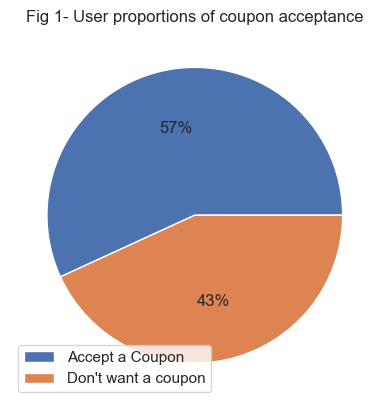

In [748]:
# The Y column captures users who chose to accept coupon 'right away' or 'after' have value of 1 and if they don't have value 0. 
# A pie chart can propotion of users who accept a coupon vs not 

counts = clean_data['Y'].astype(str).str.replace('1', "Accept a Coupon").str.replace('0', "Don't want a coupon").value_counts()
plt.pie(counts, autopct='%1.0f%%')
plt.title("Fig 1- User proportions of coupon acceptance")
plt.savefig("images/fig1-coupons_acceptance_prop.png")
plt.legend(labels=counts.index)
plt.show()
plt.close()

57% of users chose to accepts a coupon

5. Use a bar plot to visualize the `coupon` column.

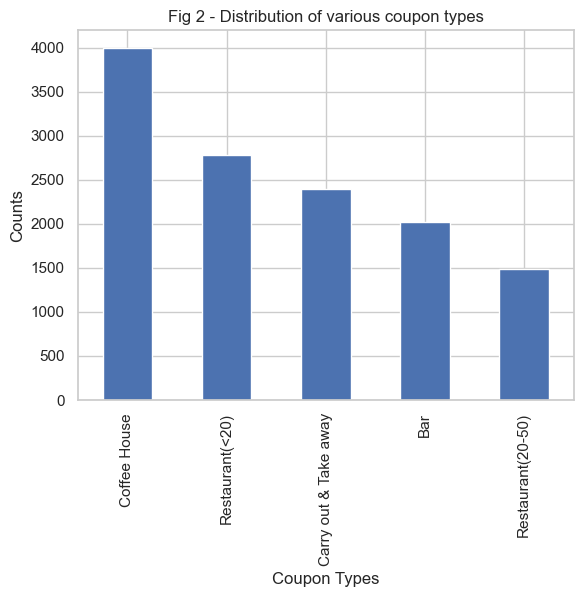

In [751]:
clean_data.coupon.value_counts().plot(kind='bar')
plt.xlabel("Coupon Types")
plt.ylabel("Counts")
plt.title("Fig 2 - Distribution of various coupon types")
plt.savefig("images/fig2-coupons_types.png")
plt.show()
plt.close()

The coupon type distribtion shows that most coupons are issued for "Coffee House", possible reason could be they being the cheapest of all the coupon types and possibly the easiest to redeem via drive thru/walkins. And as expected the least for "Restaurant(20-50)"   



6. Use a histogram to visualize the temperature column.

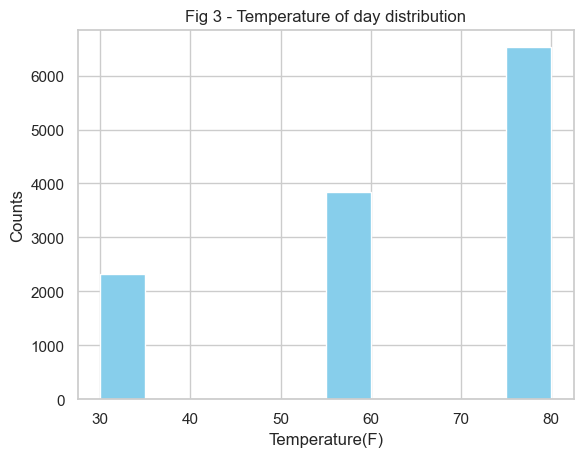

In [754]:
plt.hist(clean_data.temperature,  bins=10 , color = 'skyblue')
plt.xlabel("Temperature(F)")
plt.ylabel("Counts") 
plt.title("Fig 3 - Temperature of day distribution")
plt.savefig("images/fig3-temperature_of_day_distribution.png")
plt.show()
plt.close()

Temperature distribution highlights that it is tends to be on the higher side of 80F and shows positive correlation to the number of coupon type "Coffee House". One can interpret that since the temperature customers will like to take a refresher drink and hence a "Coffee House" coupon could be more redeeemable entity.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [757]:
bar_coupon_df = clean_data.query('coupon == "Bar"')
bar_coupon_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


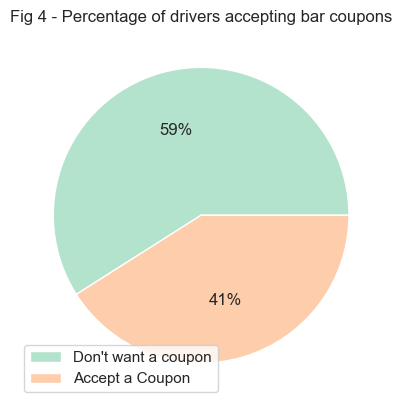

In [759]:
counts = bar_coupon_df['Y'].astype(str).str.replace('1', "Accept a Coupon").str.replace('0', "Don't want a coupon").value_counts()
plt.pie(counts, autopct='%1.0f%%', colors=plt.cm.Pastel2.colors)
plt.title("Fig 4 - Percentage of drivers accepting bar coupons")
plt.legend(labels=counts.index)
plt.savefig("images/fig4-proportion_user_accepting_coupons.png")
plt.show()
plt.close()

Drivers accepting a bar coupon is < 50%. So lets try to see which how many times a drivers visit a bar

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [762]:
#Dunp the unique bar values
bar_coupon_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

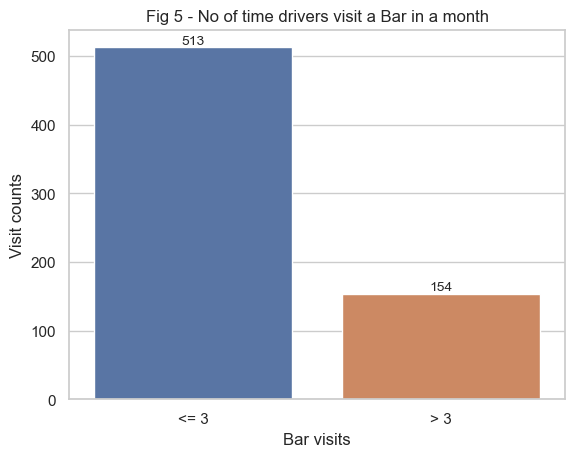

In [763]:

# Query selection list

three_or_less_bar_visit = ['1~3', 'less1']
more_than_three_bar_visit = ['4~8', 'gt8']

# Count how many drivers are in the list of bar goers 3 or less
bar_visits_3_or_less = bar_coupon_df.query('Y == 1 and Bar in @three_or_less_bar_visit')['Bar'].value_counts().sum()

# Who went to bar more than 3 include '4~8' and gt8.  
bar_visits_3_or_more = bar_coupon_df.query('Y == 1 and Bar in @more_than_three_bar_visit')['Bar'].value_counts().sum()

#Create a dataseries with driver counts for above categores
series_bar_3_less_or_more = pd.Series(data={'barVisits <= 3': bar_visits_3_or_less,
     'barVisits > 3':  bar_visits_3_or_more}, index=['barVisits <= 3', 'barVisits > 3'])

dict1 = {'BarVisits': pd.Series(['<= 3', '> 3']),
         'Count': pd.Series([ bar_visits_3_or_less, bar_visits_3_or_more])}

# Convert that dictionary to dataframe
result = pd.DataFrame(dict1)

# Draw a barplot for that dataframe
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=result, x='BarVisits', y='Count')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel("Bar visits")
plt.ylabel("Visit counts")
plt.title('Fig 5 - No of time drivers visit a Bar in a month') 
plt.savefig("images/fig5-bar_visits.png")
plt.show()
plt.close()

The drivers who visit a bar 3 times or less is more than 3 times to the drivers who visit that more times. So one of the target audience for bar coupons should be drivers who visit a bar < 3 times

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [766]:
#Dunp the unique age values
bar_coupon_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

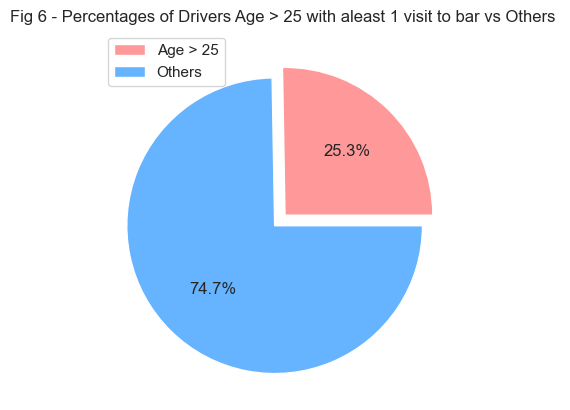

In [767]:

# Query selection list

tf_plus_age_group = ['26', '31', '36', '41', '46', '50plus']
below_age_group = ['21', 'below21']

more_than_one_bar_visit = ['1~3', '4-8', 'gt8']

# Calculate the groups of drivers
bar_vists_25_more_than_1 = bar_coupon_df.query(('Y == 1 and age in @tf_plus_age_group and Bar in @more_than_one_bar_visit'))['Bar'].value_counts().sum()

# Other = ( total bar goers - drivers age >25 and visit one time)
others = bar_coupon_df.query('Y == 1')['Bar'].value_counts().sum()  - bar_vists_25_more_than_1

#We will use pie plot to show the percentages 

explode = (0, 0.1)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Initialize data to Dicts of series.
series_bar_goers_to_others = pd.Series(data={'Age > 25': bar_vists_25_more_than_1,
     'Others': others }, index=['Age > 25', 'Others'])
#series_bar_goers_to_others.to_frame().plot(kind='bar')

#plt.pie(series_bar_goers_to_others, autopct='%1.0f%%', colors=sns.color_palette('Set2'))
plt.pie(series_bar_goers_to_others, autopct='%1.1f%%', colors=colors, explode=explode)

plt.title("Fig 6 - Percentages of Drivers Age > 25 with aleast 1 visit to bar vs Others ")
plt.legend(labels=series_bar_goers_to_others.index)
plt.savefig("images/fig6-proportion_user_25_going_bar.png")
plt.show()
plt.close()

The above shows that <br>
  <ul><li>75% of drivers who visit a bar are below the age of 25 yrs</li>
      <li>and, Age > 25 yrs age groups drivers visit is 25% </li>
  </ul>

Lets draw a heapmap to see if we do any correlation of the hypothesis


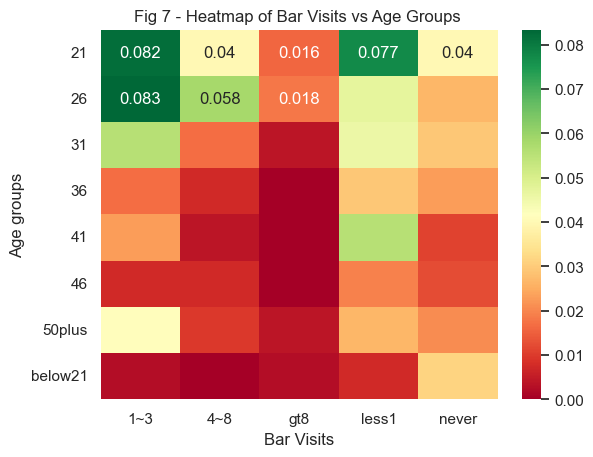

In [769]:
more_than_once_df = bar_coupon_df.query('Y == 1')
sns.heatmap(pd.crosstab(more_than_once_df.age, more_than_once_df.Bar, normalize=True), cmap='RdYlGn', annot=True)
plt.title("Fig 7 - Heatmap of Bar Visits vs Age Groups ")
plt.xlabel("Bar Visits")
plt.ylabel("Age groups")
plt.savefig("images/fig7-heatmap_bar_age.png")
plt.show()
plt.close()

The "Green" color on the map above shows positive correlation of Bar Visits between 1-3 visits a month between age groups 21 and 26 years old

Now let's see do these drivers <br> <ol><li>Travel alone or with somebody</li><li>what is the occupation of these bar goers</li></ol>

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [772]:
#Dunp the unique passangers values
bar_coupon_df['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [773]:
#Dunp the unique occupation values
bar_coupon_df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

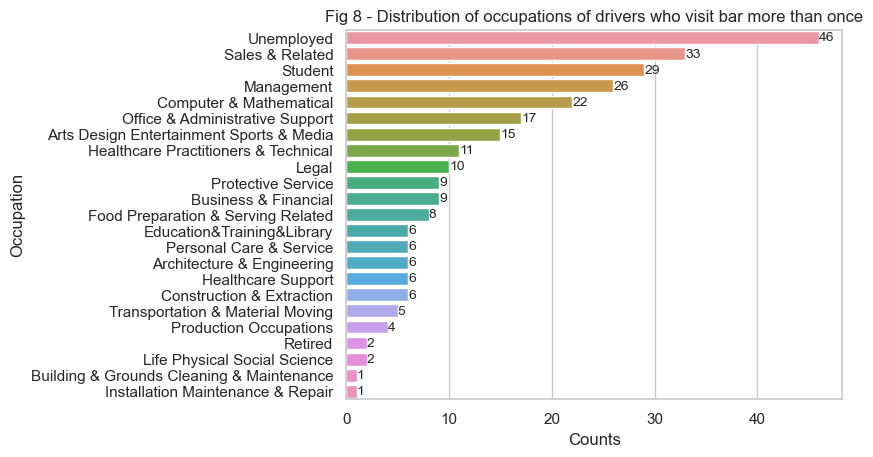

In [774]:
# Query selection list
adult_passengers = ['Alone', 'Friend(s)','Partner' ]
# For exclusion in occupation
farming_fishing_forestry = ['Farming Fishing & Forestry']

#Get occupation counts of bar coupon drivers who visit bar > 1 and have an adult as passenger and have occupation other than forest/fishing/forestry
occupation_count = bar_coupon_df.query( ('Y == 1 and passanger in @adult_passengers and Bar in @more_than_one_bar_visit and occupation not in @farming_fishing_forestry'))['occupation'].value_counts().reset_index()

# Use a barplot to show the distribution of drivers occupation
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=occupation_count, y='occupation', x='count')
plt.title("Fig 8 - Distribution of occupations of drivers who visit bar more than once")
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel("Counts")
plt.ylabel("Occupation")
plt.savefig("images/fig8-drivers_occupations.png")
plt.show()
plt.close()

The above data shows that occupation(Top5) of drivers visiting a bar > 1, having a adult passenger are <br>
  <ol><li>Unemployed</li>
      <li>Sales & Related</li>
      <li>Student</li>
      <li>Management</li>
      <li>Computer & Mathematical</li>
  </ol>

Let's try to do some correlation between drivers occupations vs Bar visits 

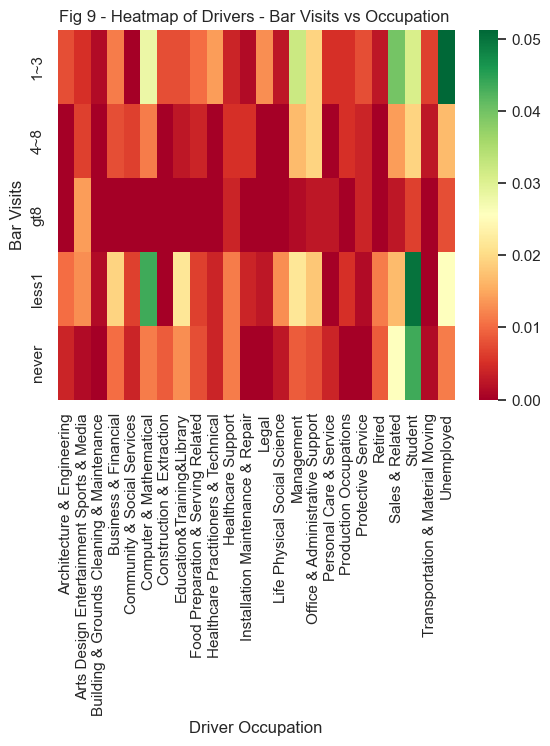

In [776]:
bar_adults_occupation_df = bar_coupon_df.query( 'Y == 1 and passanger in @adult_passengers and occupation not in @farming_fishing_forestry')
sns.heatmap(pd.crosstab(bar_adults_occupation_df.Bar, bar_adults_occupation_df.occupation, normalize=True), cmap='RdYlGn')
plt.title("Fig 9 - Heatmap of Drivers - Bar Visits vs Occupation ")
plt.ylabel("Bar Visits")
plt.xlabel("Driver Occupation")
plt.savefig("images/fig-heatmap_bar_occupation.png")
plt.show()
plt.close()

The above data shows that drivers who are<br>
  <ul><li>Unemployed - are the max numbers of drivers visits the bar between 1-3 times a month/li>
      <li>Sales & Related - Also tend visit the bar 1-3 times, </li>
      <li>Student - Mostly visits the bar less < 1 times</li>
      <li>Management</li>
      <li>Computer & Mathematical</li>
  </ul>

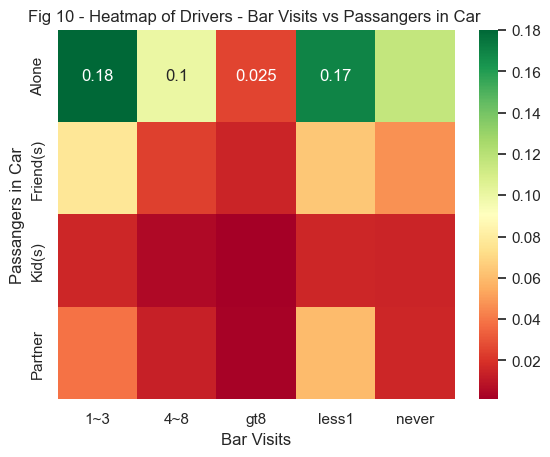

In [778]:
# Check if there is any correlation of bar visits, passangers in car
sns.heatmap(pd.crosstab(more_than_once_df.passanger, more_than_once_df.Bar, normalize=True), cmap='RdYlGn', annot=True)
plt.title("Fig 10 - Heatmap of Drivers - Bar Visits vs Passangers in Car ")
plt.xlabel("Bar Visits")
plt.ylabel("Passangers in Car")
plt.savefig("images/fig10-heatmap_bar_passangers.png")
plt.show()
plt.close()

The above data shows that drivers who are<br>
  <ul><li>Alone - Mostly visit a bar 3 or less times</li>
      <li>Friends - Sometimes 1-3 times  </li>
      <li>Partners - mostly less than 1 time </li>
      <li>Never with Kids as passangers</li>
  </ul>

The next intersting feature we can look at are <br><ul><li> "martialStatus' </li><li>"gender" </li><li>"time" of the day</li></ul> of those drivers when they visit a bar


6. Compare the acceptance rates between those drivers who:, <br>
    - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*,
    - go to bars more than once a month and are under the age of 30 *OR*,
    - go to cheap restaurants more than 4 times a month and income is less than 50K.,
    <br>
 

In [781]:
#Dunp the unique occupation values
bar_coupon_df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

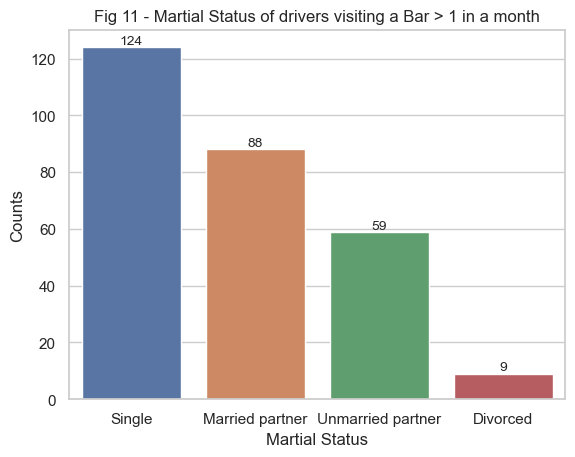

In [782]:
widowed = ['Widowed']
# Bar > 1 and martialStatus and No Kids 
query_df = bar_coupon_df.query(('Y == 1 and passanger in @adult_passengers and Bar in @more_than_one_bar_visit and maritalStatus not in @widowed'))

# Draw a barplot for this query
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=query_df.maritalStatus.value_counts().reset_index(), x='maritalStatus', y='count')
ax.bar_label(ax.containers[0], fontsize=10);
plt.xlabel("Martial Status")
plt.ylabel("Counts")
plt.title('Fig 11 - Martial Status of drivers visiting a Bar > 1 in a month') 
plt.savefig("images/fig11-martial_status_bar_visits.png")
plt.show()
plt.close()

The above bar chart shows that max count of drivers who visit a bar > 1 times a month, followed by "Married partners" and the least count who visit bar are the "Divorced". What the count plot does not show any correlation pattern of martial status of drivers to the bar visits. Lets see if the Heapmap shows that "Singles" have a correlation to bar visits, since there count is max

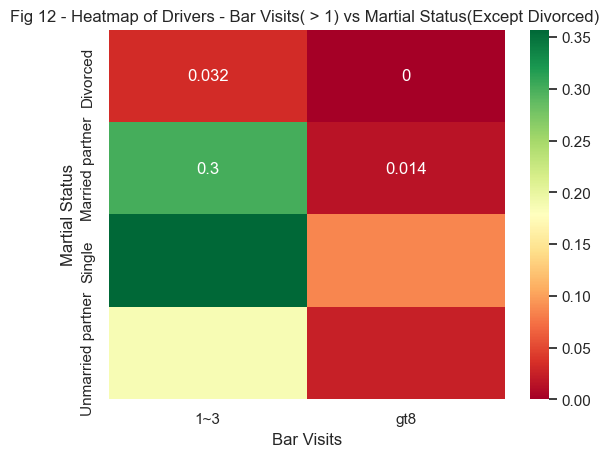

In [784]:
# Check if there is any correlation of bar visits, martialstatus of drivers based on criteria 
# Bar > 1 and martialStatus and No Kids 
sns.heatmap(pd.crosstab(query_df.maritalStatus, query_df.Bar, normalize=True), cmap='RdYlGn', annot=True)
plt.title("Fig 12 - Heatmap of Drivers - Bar Visits( > 1) vs Martial Status(Except Divorced) ")
plt.xlabel("Bar Visits")
plt.ylabel("Martial Status")
plt.savefig("images/fig12-heatmap_bar_ms.png")
plt.show()
plt.close()

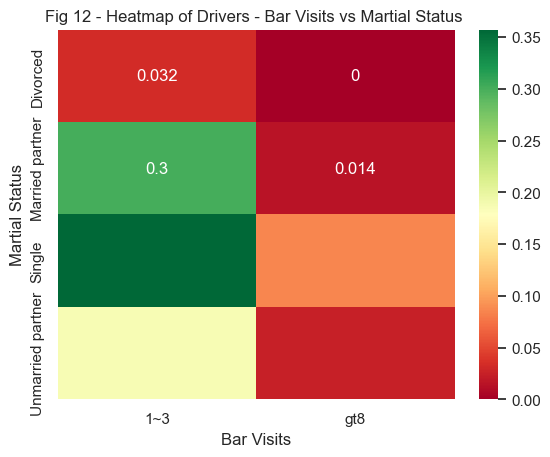

In [785]:
# Check if do see any correlatioof bar visits, with martial Status 
sns.heatmap(pd.crosstab(query_df.maritalStatus, query_df.Bar, normalize=True), cmap='RdYlGn', annot=True)
plt.title("Fig 12 - Heatmap of Drivers - Bar Visits vs Martial Status ")
plt.xlabel("Bar Visits")
plt.ylabel("Martial Status")
plt.savefig("images/fig12-heatmap_bar_ms.png")
plt.show()
plt.close()

Fig 12 confirms that "Single" visit bar between 1 - 3 times a month have the best acceptance rate for the coupon, followed by the Married Partners

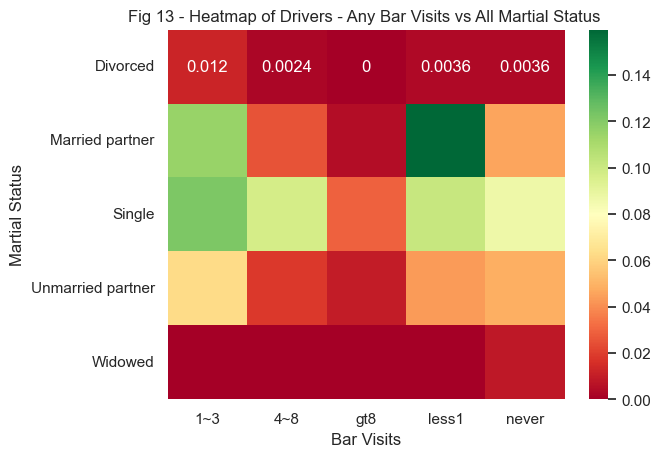

In [787]:
# Not visiting the Bar 
sns.heatmap(pd.crosstab(more_than_once_df.maritalStatus, more_than_once_df.Bar, normalize=True), cmap='RdYlGn', annot=True)
plt.title("Fig 13 - Heatmap of Drivers - Any Bar Visits vs All Martial Status ")
plt.xlabel("Bar Visits")
plt.ylabel("Martial Status")
plt.savefig("images/fig13-heatmap_bar_ms.png")
plt.show()
plt.close()

Interestingly the "Married partner" have the best correlation to visit the bar < 1(less than 1) times than the "Single" as represented in  the previous Fig 12. However for "Single" the bar visits are across all valueset between 1-3, 4-8, less1 and gt8, So the overall count of bar visits will be big. Unmarried partners visit very sparingly to bar even after accepting a coupon and Divorced go not visit the bar at all even if they accept a bar coupon. 

Another feature to compare in the dataset would ve "time" of day, when the bar visits happen

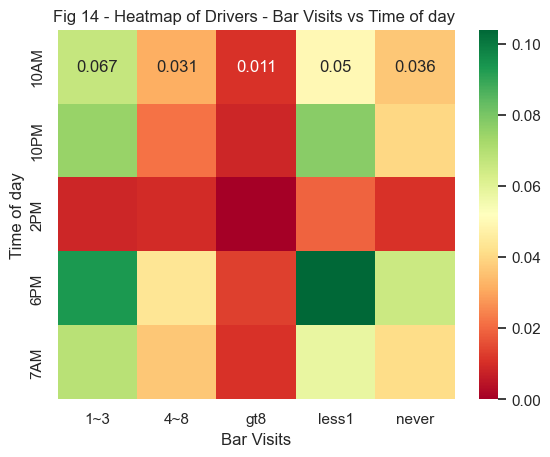

In [790]:
# Check if there is draw correlation of bar visits, time of day of drivers 
sns.heatmap(pd.crosstab(more_than_once_df.time, more_than_once_df.Bar, normalize=True), cmap='RdYlGn', annot=True)
plt.title("Fig 14 - Heatmap of Drivers - Bar Visits vs Time of day ")
plt.xlabel("Bar Visits")
plt.ylabel("Time of day")
plt.savefig("images/fig14-heatmap_bar_time.png")
plt.show()
plt.close()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Findings

<ul>
    <li>Of the total drivers who were might accept a bar coupon are y 41% of all drivers(Fig 4)</li>
    <li>Of the drivers who might accepts a bar coupon, more than 75% visit a bar 3 times or less than who those drivers who visit that more times(Fig 5)</li>
    <li>75% of drivers those who visit a bar between 1 - 3 times are below the age < 25 yrs(Fig 6 & 7)</li>
    <li>Drivers who accept bar coupon visit the bar are mostly
        <ul><li>Alone</li><li>Friends</li><li>Partners</li></ul>
        Never when a kid in the car
    </li>
    <li>Drivers visit a bar more than once a month are mostly
        <ul><li>Unemployed</li>
        <li>Or hold good jobs like Sales & Related, Management, Computer & Mathematical </li>
        <li>Students also visits bar more than once a month</li>
        </ul>
    </li>
    <li>Drivers visiting a bar atleast 1 or more time are mostly Students and Married partners only visit a bar < 1 </li>
    <li>Drivers visit the bar between 6-10pm(Fig 13) </li>
</ul>

### Analysis
So the target audience drivers who are Alone in the car and below <= 26 yrs, mostly likely on their way back home after 6:00 pm. Single or Married with a Friend who are either unemployed or students are most likely to accept a coupon. Married Partners are other group are more likely to accept a atleast coupon once a month and never when the kid is in the car. 

### Next Steps
The next interesting feature we can look at are <br><ul><li>"gender" </li><li>Driection of Driving</li><li>Weather</li></ul> of those drivers when they visit a bar, whether acceptance of drivers can be increased

Since most drivers are "Unemployed" possibly "income" feature may not be the best criteria for Bar Coupons acceptance. Also based on this data the 'education" feature is something we can ignore becaue 8/10 occupation of drivers shows they are well-educated.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  